In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
df = pd.read_csv("Automobile_Loan.csv")
df_al = df.copy()

# We have imported our libraries.
# We applied a filter to ignore warnings.
# We removed the column limit for the columns that will be created during the encoding process in our dataset.
# We fetched our dataset.
# We made a copy of our dataset. We used the copy operation for faster processing.

In [2]:
df_al.head()
# We called our dataset to take a look at it.

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
df_al.info()
# We printed out information about our dataset to learn more about it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [4]:
df_al.isnull().mean()*100
# We printed out the percentage of missing values in the relevant columns of our dataset.

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [5]:
df_al.Accompany_Client = df_al.Accompany_Client.replace('#','').replace('',np.nan)

# When we printed out the information about the Accompany Client column in our dataset, we replaced irrelevant data with empty values.

In [6]:
object_sutunlar = df_al.select_dtypes(include="object").columns
for col in object_sutunlar:
    print(df_al[col].value_counts())
    print("------------------")

# We need numerical data to build our model.
# For this, we printed out the information about the non-numeric columns in our dataset.

13500       11908
11250       10302
15750        8719
18000        8215
9000         7577
            ...  
13005.0         1
11835.0         1
25026.3         1
12285.0         1
12840.75        1
Name: Client_Income, Length: 1516, dtype: int64
------------------
45000.0      2513
67500.0      2340
22500.0      2090
27000.0      1865
18000.0      1847
             ... 
126149.85       1
41040           1
201213.9        1
71174.7         1
135534.6        1
Name: Credit_Amount, Length: 6816, dtype: int64
------------------
900        1885
1350       1684
675         682
1012.5      622
3780        504
           ... 
6178.95       1
1148.4        1
2736.9        1
1109.7        1
2989.35       1
Name: Loan_Annuity, Length: 16680, dtype: int64
------------------
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64
------------------
Service            61028
Commercial         2

In [7]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

# We replaced irrelevant data with empty values in the Population_Region_Relative column of our dataset.
# When we examined the data entries in the column we are interested in, we noticed that they were entered as numerical data but saved as non-numeric data type.
# To convert our column to numerical data, we wrote the relevant code and transformed it into a numerical column.

In [8]:
for value in df_al["Client_Income"]:
    if pd.notnull(value) and value<'0':
        print(value)

# We created a loop to check for irrelevant data in the "Client Income" column and printed it out.

$
$
$
$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [9]:
df_al.Client_Income = df_al.Client_Income.replace('$', '').replace('', np.nan)
df_al.Client_Income = df_al.Client_Income.astype(float)

# We replaced the irrelevant data that was printed out with empty values.

In [10]:
for value in df_al["Credit_Amount"]:
    if pd.notnull(value) and value<'0':
        print(value)

# We created a loop to check for irrelevant data in the "Credit Amount" column and printed it out.

$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [11]:
df_al.Credit_Amount = df_al.Credit_Amount.replace('$', '').replace('', np.nan)
df_al.Credit_Amount = df_al.Credit_Amount.astype(float)

# We replaced the irrelevant data in the "Credit Amount" column with empty values.
# Since the "Credit Amount" column was defined as an "object" data type, we examined the data within it and changed the data type to numerical.

In [12]:
for value in df_al["Loan_Annuity"]:
    if pd.notnull(value) and value<'0':
        print(value)

# We created a loop to check for irrelevant data in the "Loan Annuity" column and printed it out.

$
#VALUE!
#VALUE!
#VALUE!
#VALUE!


TypeError: '<' not supported between instances of 'float' and 'str'

In [13]:
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('$', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('#VALUE!', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.astype(float)

# We replaced the irrelevant data in the "Loan Annuity" column with empty values.
# Since the "Loan Annuity" column was defined as an object data type, we examined the data within it and changed the data type to numerical.

In [14]:
for value in df_al["Accompany_Client"]:
    if pd.notnull(value) and value<'0':
        print(value)

df_al.Accompany_Client = df_al.Accompany_Client.replace('##', '').replace('', np.nan)
df_al.Accompany_Client.value_counts()

# We created a loop to check for irrelevant data in the "Accompany Client" column and printed it out.
# Finally, we printed the values of the relevant column to check them.

##
##
##
##
##
##
##
##
##
##
##
##


Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [15]:
for value in df_al["Client_Gender"]:
    if pd.notnull(value) and value!='Male' and value!='Female':
        print(value)

df_al.Client_Gender = df_al.Client_Gender.replace('XNA', '').replace('', np.nan)
df_al.Client_Gender.value_counts()

# We wrote a loop for the "Client Gender" column to find and print out the non-empty values that are neither "Male" nor "Female" to identify irrelevant data.
# After finding the irrelevant data, we replaced them with empty values and printed out the data values of the column to check them.

XNA
XNA
XNA


Male      78463
Female    40977
Name: Client_Gender, dtype: int64

In [16]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

# We observed that the "Population_Region_Relative" column was of type "object" and contained irrelevant data when we printed its values using a loop.
# To expedite our process and replace the irrelevant data with empty values, we avoided using a loop.
# Since the data in our column was numerical, despite being stored as an object data type, we converted the data type to numerical.

In [17]:
df_al.Age_Days = df_al.Age_Days.replace('x', '').replace('', np.nan)
df_al.Age_Days = df_al.Age_Days.astype(float)

# We replaced the irrelevant values in the "Age_Days" column with empty values.

In [18]:
df_al.Employed_Days = df_al.Employed_Days.replace('x', '').replace('', np.nan)
df_al.Employed_Days = df_al.Employed_Days.astype(float)

# We replaced the irrelevant values in the "Employed_Days" column with empty values.

In [19]:
df_al.Registration_Days = df_al.Registration_Days.replace('x', '').replace('', np.nan)
df_al.Registration_Days = df_al.Registration_Days.astype(float)

# We replaced the irrelevant values in the "Registration_Days" column with empty values.

In [20]:
df_al.ID_Days = df_al.ID_Days.replace('x', '').replace('', np.nan)
df_al.ID_Days = df_al.ID_Days.astype(float)

# We replaced the irrelevant values in the "ID_Days" column with empty values.

In [21]:
df_al.Type_Organization = df_al.Type_Organization.replace('XNA', '').replace('', np.nan)

# We replaced the irrelevant values in the "Type_Organization" column with empty values.

In [22]:
df_al.Score_Source_3 = df_al.Score_Source_3.replace('&', '').replace('', np.nan)
df_al.Score_Source_3 = df_al.Score_Source_3.astype(float)

# We replaced the irrelevant values in the "Score_Source_3" column with empty values.

In [23]:
def fix_value_by_map(current_value, default, value_map):
    if str(current_value) == 'nan':
        return value_map[default]
    else:
        return current_value

# We created a mapping function to continue the data preprocessing.

In [24]:
value_map = df_al.groupby('Default').median()['Client_Income']
df_al['Client_Income'] = df_al.apply(lambda row : fix_value_by_map(row['Client_Income'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Client Income" column 
# with our dependent variable column and filled the missing values with the median value.

In [25]:
value_map = df_al.groupby(['Client_Income','Default']).mean()['Loan_Annuity']

def get_Loan_Annuity_by_Client_Income_and_Default(loan_annuity, client_income, default, value_map):
    new_loan_annuity = loan_annuity
    if str(new_loan_annuity) == 'nan':
        for key in value_map.keys():
            if default == key[1]:
                if client_income < key[0]:
                    continue
                else:
                    new_loan_annuity = value_map[key]
                    break
            else:
                continue
    return new_loan_annuity

df_al['Loan_Annuity'] = df_al.apply(lambda row :
get_Loan_Annuity_by_Client_Income_and_Default(row['Loan_Annuity'],
                            row['Client_Income'],row['Default'], value_map), axis=1)

# We examined our Loan Annuity data based on the "Client Income" and "Default" columns.
# In the function we created, we checked for missing values and performed reindexing based on the values in the "Default" column.
# After the reindexing, we filled the Loan Annuity data with the mean value.

In [26]:
value_map = df_al.groupby('Default').median()['Score_Source_1']
df_al['Score_Source_1'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_1'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Score_Source_1" column with our dependent variable column and filled the missing values with the median value.

In [27]:
value_map = df_al.groupby('Default').median()['Score_Source_2']
df_al['Score_Source_2'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_2'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Score_Source_2" column with our dependent variable column and filled the missing values with the median value.

In [28]:
value_map = df_al.groupby('Default').median()['Score_Source_3']
df_al['Score_Source_3'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_3'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Score_Source_3" column with our dependent variable column and filled the missing values with the median value.

In [29]:
value_map = df_al.groupby('Default').mean()['Social_Circle_Default']
df_al['Social_Circle_Default'] = df_al.apply(lambda row : fix_value_by_map(row['Social_Circle_Default'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Social_Circle_Default" column with our dependent variable column and filled the missing values with the mean value.

In [30]:
value_map = df_al.groupby('Default').median()['Phone_Change']
df_al['Phone_Change'] = df_al.apply(lambda row : fix_value_by_map(row['Phone_Change'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Phone_Change" column with our dependent variable column and filled the missing values with the median value.

In [31]:
value_map = df_al.groupby('Default').median()['Credit_Bureau']
df_al['Credit_Bureau'] = df_al.apply(lambda row : fix_value_by_map(row['Credit_Bureau'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Credit_Bureau" column with our dependent variable column and filled the missing values with the median value.

In [32]:
value_map = df_al.groupby('Default').median()['Credit_Amount']
df_al['Credit_Amount'] = df_al.apply(lambda row : fix_value_by_map(row['Credit_Amount'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Credit_Amount" column with our dependent variable column and filled the missing values with the median value.

In [33]:
value_map = df_al.groupby('Default').median()['Age_Days']
df_al['Age_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Age_Days'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Age_Days" column with our dependent variable column and filled the missing values with the median value.

In [34]:
value_map = df_al.groupby('Default').median()['Employed_Days']
df_al['Employed_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Employed_Days'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Employed_Days" column with our dependent variable column and filled the missing values with the median value.

In [35]:
value_map = df_al.groupby('Default').median()['Registration_Days']
df_al['Registration_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Registration_Days'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Registration_Days" column with our dependent variable column and filled the missing values with the median value.

In [36]:
value_map = df_al.groupby('Default').median()['ID_Days']
df_al['ID_Days'] = df_al.apply(lambda row : fix_value_by_map(row['ID_Days'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "ID_Days" column with our dependent variable column and filled the missing values with the median value.

In [37]:
value_map = df_al.groupby('Default').median()['Cleint_City_Rating']
df_al['Cleint_City_Rating'] = df_al.apply(lambda row : fix_value_by_map(row['Cleint_City_Rating'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Cleint_City_Rating" column with our dependent variable column and filled the missing values with the median value.

In [38]:
value_map = df_al.groupby('Default').median()['Application_Process_Day']
df_al['Application_Process_Day'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Day'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Application_Process_Day" column with our dependent variable column and filled the missing values with the median value.

In [39]:
value_map = df_al.groupby('Default').median()['Application_Process_Hour']
df_al['Application_Process_Hour'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Hour'], row['Default'], value_map), axis=1)

# Using the mapping function we created, we grouped the data in the "Application_Process_Hour" column with our dependent variable column and filled the missing values with the median value.

In [40]:
df_al['Accompany_Client'].fillna(df_al['Accompany_Client'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Accompany_Client = encoder.fit_transform(df_al.Accompany_Client)
df_al[['Accompany_Client']].value_counts()

# We filled the empty parts in the "Accompany_Client" column with the most frequent [mode] value.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: Alone, 1: Group, 2: Kids, 3: Others, 4: Partner, 5: Relative)

Accompany_Client
0                   99167
5                   15748
4                    4516
2                    1334
3                     987
1                     104
dtype: int64

In [41]:
df_al['Client_Education'].fillna(df_al['Client_Education'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Client_Education = encoder.fit_transform(df_al.Client_Education)
df_al.Client_Education.value_counts()

# We filled the empty parts in the "Client_Education" column with the most frequent [mode] value.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: Graduation, 1: Graduation dropout, 2: Junior secondary, 3: Post Grad, 4: Secondary)

4    87556
0    28819
1     3960
2     1455
3       66
Name: Client_Education, dtype: int64

In [42]:
df_al[['Client_Marital_Status']] = df_al[['Client_Marital_Status']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Marital_Status = encoder.fit_transform(df_al.Client_Marital_Status)
df_al.Client_Marital_Status.value_counts()

# We filled the empty parts in the "Client_Marital_Status" column with the value 'Other'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: D, 1: M, 2: Other, 3: S, 4: W)

1    87349
3    17404
0     7556
4     6074
2     3473
Name: Client_Marital_Status, dtype: int64

In [43]:
df_al[['Client_Gender']] = df_al[['Client_Gender']].fillna(value='Unknown')

encoder = LabelEncoder()
df_al.Client_Gender = encoder.fit_transform(df_al.Client_Gender)
df_al.Client_Gender.value_counts()

# We filled the empty parts in the "Client_Gender" column with the value 'Unknown'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (1: Male, 2: Female, 3: Unknown)

1    78463
0    40977
2     2416
Name: Client_Gender, dtype: int64

In [44]:
df_al[['Client_Income_Type']] = df_al[['Client_Income_Type']].fillna("Unknown")

encoder = LabelEncoder()
df_al.Client_Income_Type = encoder.fit_transform(df_al.Client_Income_Type)
df_al[['Client_Income_Type']].value_counts()

# We filled the empty parts in the "Client_Gender" column with the value 'Unknown'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: Businessman, 1: Commercial, 2: Government Job, 3: Maternity Leave, 4: Retired, 5: Service, 6: Student, 7: Unemployed, 8: Unknown)

Client_Income_Type
5                     61028
1                     27764
4                     21043
2                      8303
8                      3701
6                         8
7                         6
3                         2
0                         1
dtype: int64

In [45]:
df_al[['Loan_Contract_Type']] = df_al[['Loan_Contract_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Loan_Contract_Type = encoder.fit_transform(df_al.Loan_Contract_Type)
df_al.Loan_Contract_Type.value_counts()

# We filled the empty parts in the "Loan_Contract_Type" column with the value 'Other'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: CL, 1: RL)

0    107118
2     11087
1      3651
Name: Loan_Contract_Type, dtype: int64

In [46]:
df_al[['Client_Housing_Type']] = df_al[['Client_Housing_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Housing_Type = encoder.fit_transform(df_al.Client_Housing_Type)
df_al.Client_Housing_Type.value_counts()

# We filled the empty parts in the "Client_Housing_Type" column with the value 'Other'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: Family, 1: Home, 2: Municipal, 3: Office, 4: Other, 5: Rental, 6: Shared)

1    104870
0      5783
2      4248
4      3687
5      1816
3      1002
6       450
Name: Client_Housing_Type, dtype: int64

In [47]:
df_al['Client_Occupation'].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Occupation = encoder.fit_transform(df_al.Client_Occupation)
df_al.Client_Occupation.value_counts()

# We filled the empty parts in the "Client_Occupation" column with the value 'Other'.
# We converted the filled column into a numerical data type using an encoding structure to make it compatible with the model.
# (0: Accountants, 1: Cleaning, 2: Cooking, 3: Core, 4: Drivers, 5: HR, 6: High skill tech, 7: IT, 8: Laborers, 9: Low-skill 
#  Laborers, 10: Managers, 11: Medicine, 12: Private service, 13: Realty agents, 14: Sales, 15: Secretaries, 16: Security, 17: Waiters/barmen, 18: Unknown)

18    41435
8     21024
14    12136
3     10611
10     8099
4      7150
6      4317
0      3766
11     3172
16     2683
2      2224
1      1722
12     1006
9       787
15      531
17      511
13      280
5       206
7       196
Name: Client_Occupation, dtype: int64

In [48]:
df_al[['Car_Owned']] = df_al[['Car_Owned']].fillna(value=1)
df_al.Car_Owned.value_counts()

0.0    77724
1.0    44132
Name: Car_Owned, dtype: int64

In [49]:
df_al[['Bike_Owned']] = df_al[['Bike_Owned']].fillna(value=1)
df_al.Bike_Owned.value_counts()

0.0    78948
1.0    42908
Name: Bike_Owned, dtype: int64

In [50]:
df_al.Active_Loan = df_al.Active_Loan.fillna(value=1)
df_al.Active_Loan.value_counts()

1.0    62648
0.0    59208
Name: Active_Loan, dtype: int64

In [51]:
df_al.House_Own = df_al.House_Own.fillna(value=0)
df_al.House_Own.value_counts()

1.0    81798
0.0    40058
Name: House_Own, dtype: int64

In [52]:
df_al.Client_Family_Members.fillna(value=0.0,inplace=True)
df_al.Client_Family_Members.value_counts()

2.0     61652
1.0     26213
3.0     20434
4.0      9583
0.0      2410
5.0      1349
6.0       157
7.0        32
8.0        11
9.0         4
10.0        3
12.0        3
16.0        2
13.0        1
14.0        1
15.0        1
Name: Client_Family_Members, dtype: int64

In [53]:
df_al['Child_Count'].fillna(df_al['Child_Count'].mode()[0], inplace=True)
df_al.Child_Count.value_counts()

0.0     86472
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [54]:
encoder = LabelEncoder()
df_al.Client_Permanent_Match_Tag = encoder.fit_transform(df_al.Client_Permanent_Match_Tag)
df_al.Client_Permanent_Match_Tag.unique()

array([1, 0])

In [55]:
encoder = LabelEncoder()
df_al.Client_Contact_Work_Tag = encoder.fit_transform(df_al.Client_Contact_Work_Tag)
df_al.Client_Contact_Work_Tag.value_counts()

1    100015
0     21841
Name: Client_Contact_Work_Tag, dtype: int64

In [56]:
encoder = LabelEncoder()
df_al.Population_Region_Relative = encoder.fit_transform(df_al.Population_Region_Relative)

In [57]:
df_al.Type_Organization.unique()

def get_sector(organization_plus_type_value):
    return str(organization_plus_type_value).lower().split('type')[0]

def get_sector_type(organization_plus_type_value):
    try:
        return int(str(organization_plus_type_value).lower().split('type')[1])
    except:
        return 0

In [58]:
df_al['Employment_Sector'] = df_al.apply(lambda row : get_sector(row['Type_Organization']), axis=1)
df_al['Employment_Sector_Type'] = df_al.apply(lambda row : get_sector_type(row['Type_Organization']), axis=1)
df_al.drop(['Type_Organization'], inplace=True, axis=1)

# We split the "Type_Organization" column into two separate columns, "Sector" and "Sector_Type," using a function.
# Instead of the "Type_Organization" column, we added these two separate columns to the dataset.

In [59]:
encoder = LabelEncoder()
df_al['Employment_Sector'] = encoder.fit_transform(df_al['Employment_Sector'])

In [60]:
df_al.dtypes

# After completing the data preprocessing, we checked the data types to ensure their compatibility with the model.

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client                int32
Client_Income_Type              int32
Client_Education                int32
Client_Marital_Status           int32
Client_Gender                   int32
Loan_Contract_Type              int32
Client_Housing_Type             int32
Population_Region_Relative      int64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation               int32
Client_Famil

In [61]:
df_al.isnull().sum()

# After completing all the data preprocessing steps, we checked again to ensure that there are no missing values in our dataset.

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members             0
Cleint_City_Rating          

In [62]:
df_al.drop('Own_House_Age',axis=1,inplace=True)
# We completed the entire preprocessing process by removing the Own_House_Age column, which had a large number of missing values, from our dataset.

df_al.drop("ID",axis=1,inplace=True)
# We performed the removal of the irrelevant column from our dataset, which is not relevant for the model we will build.

In [63]:
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   121856 non-null  float64
 2   Bike_Owned                  121856 non-null  float64
 3   Active_Loan                 121856 non-null  float64
 4   House_Own                   121856 non-null  float64
 5   Child_Count                 121856 non-null  float64
 6   Credit_Amount               121856 non-null  float64
 7   Loan_Annuity                121856 non-null  float64
 8   Accompany_Client            121856 non-null  int32  
 9   Client_Income_Type          121856 non-null  int32  
 10  Client_Education            121856 non-null  int32  
 11  Client_Marital_Status       121856 non-null  int32  
 12  Client_Gender               121856 non-null  int32  
 13  Loan_Contract_

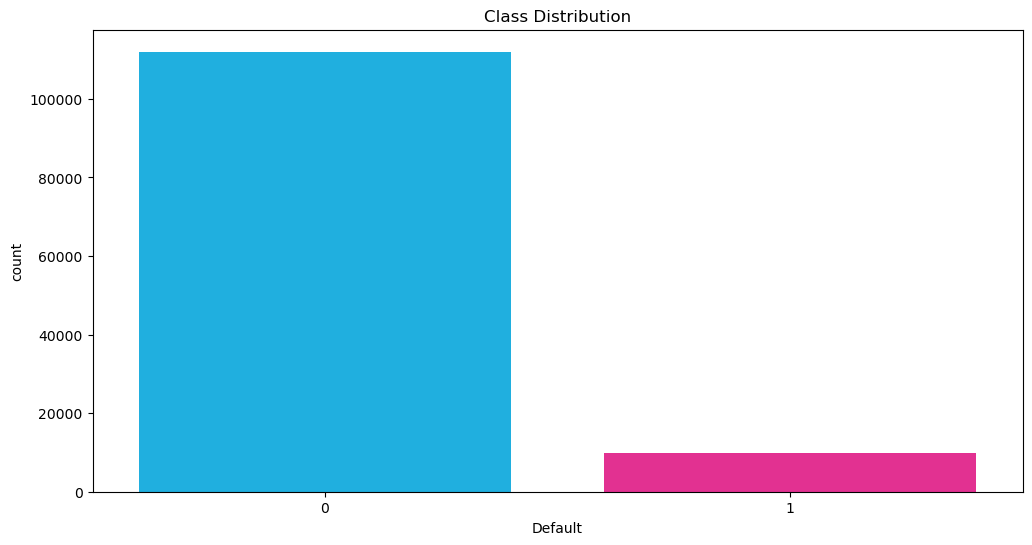

% of no defaults       : 91.92079175420169
Number of no defaults     : 112011
% of defaults         : 8.07920824579832
Number of defaults    : 9845


In [64]:
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Default', data = df_al, palette = my_pal)
plt.title('Class Distribution')
plt.show()

Count_Normal_transacation = len(df_al[df_al['Default']==0])
Count_Fraud_transacation = len(df_al[df_al['Default']==1])
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

# We performed visualization to display the number of defaults and non-defaults in our dataset and printed it on the screen.

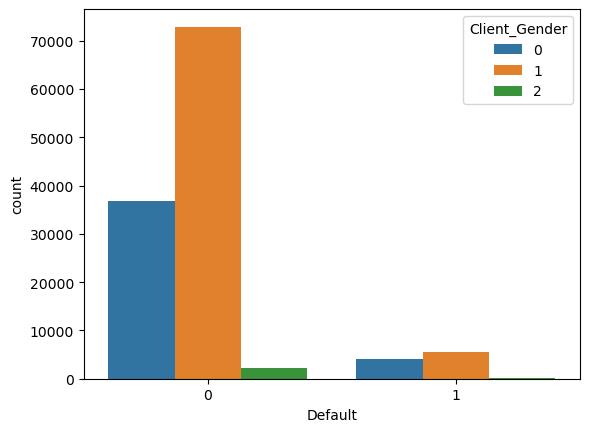

In [65]:
sns.countplot(data=df_al , x="Default" , hue = "Client_Gender")
plt.show()

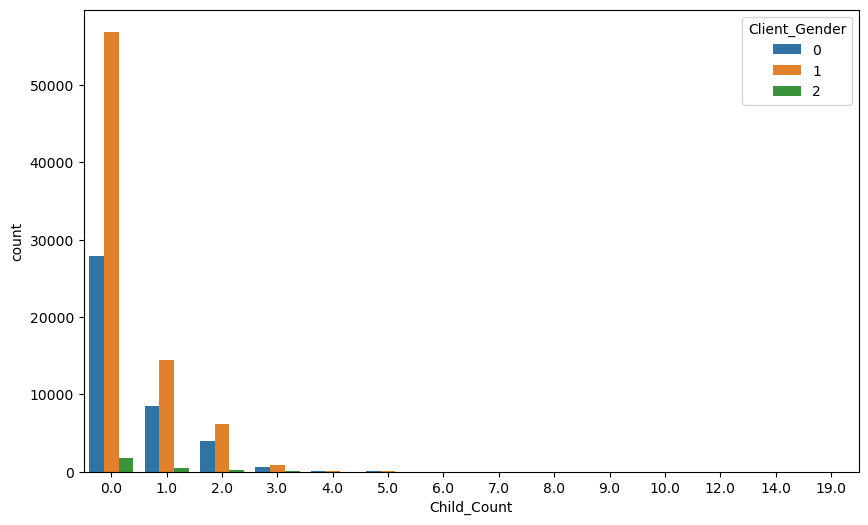

In [66]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_al, x="Child_Count", hue="Client_Gender")
plt.show()

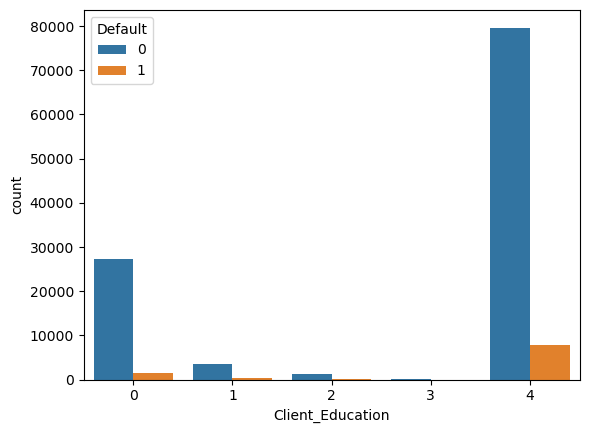

In [67]:
sns.countplot(data=df_al , x ="Client_Education", hue = "Default")
plt.show()

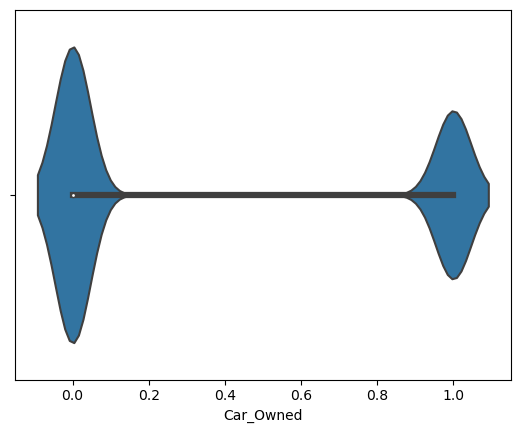

In [68]:
sns.violinplot(data=df_al , x ="Car_Owned", hue = "Active_Loan")
plt.show()

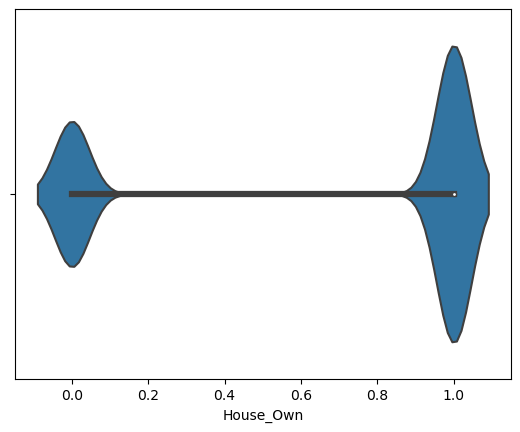

In [69]:
sns.violinplot(data=df_al , x ="House_Own", hue = "Active_Loan")
plt.show()

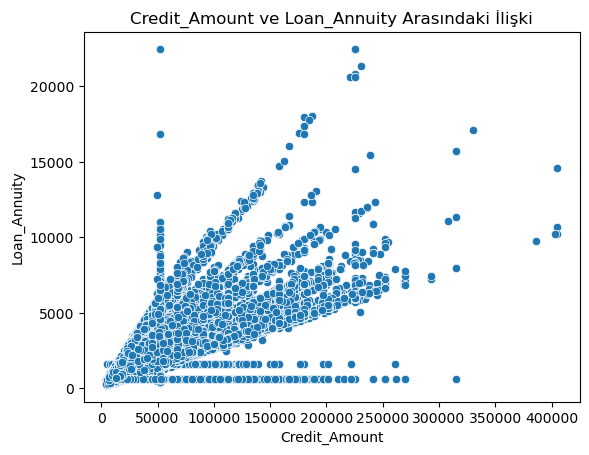

In [70]:
sns.scatterplot(x='Credit_Amount', y='Loan_Annuity', data=df_al)

plt.title('Credit_Amount ve Loan_Annuity Arasındaki İlişki')
plt.show()

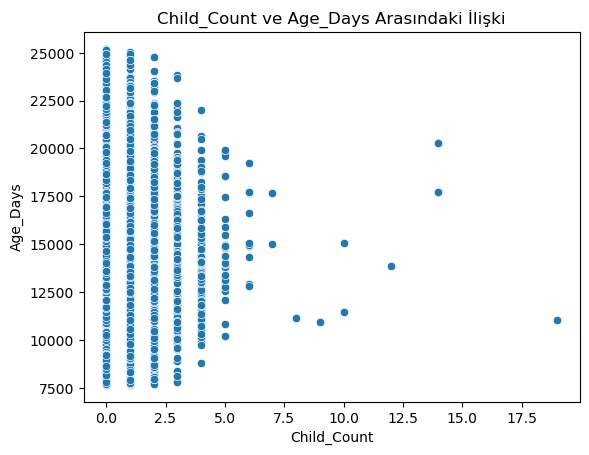

In [71]:
sns.scatterplot(x='Child_Count', y='Age_Days', data=df_al)

plt.title('Child_Count ve Age_Days Arasındaki İlişki')
plt.show()

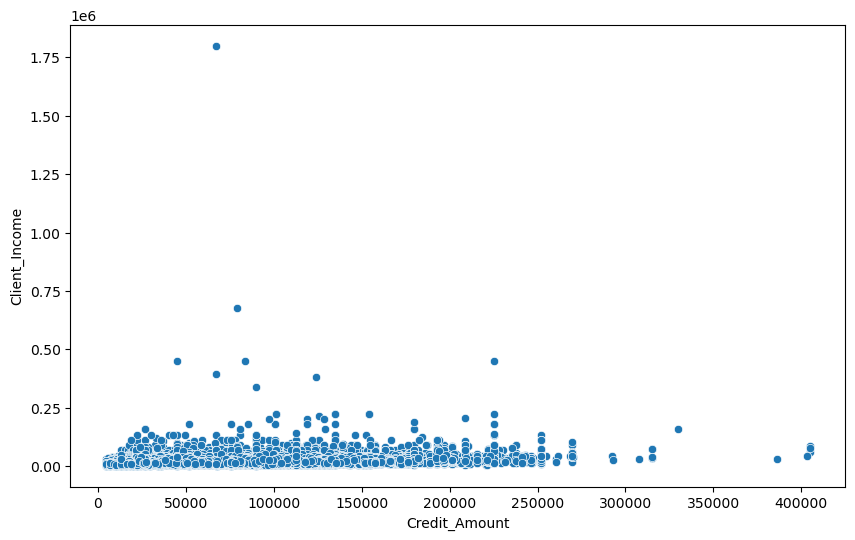

In [72]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Credit_Amount', y='Client_Income', data=df_al)
plt.show()

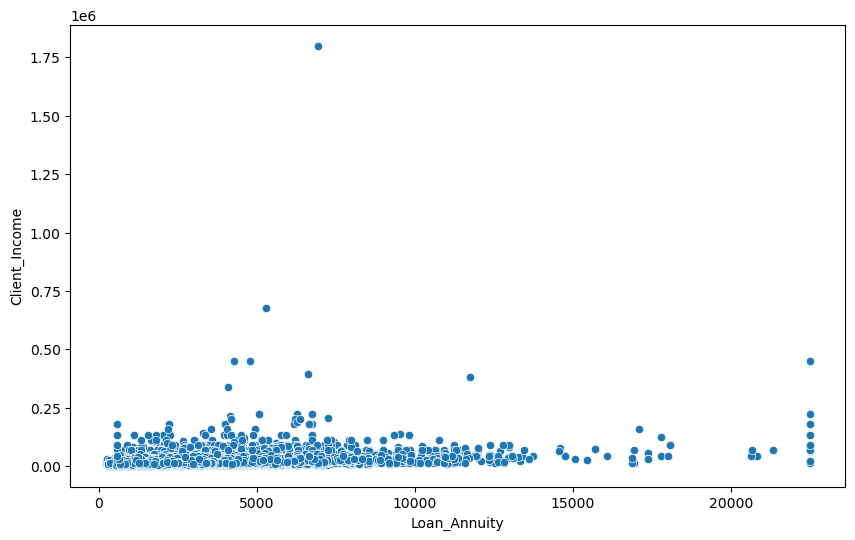

In [73]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Loan_Annuity', y='Client_Income', data=df_al)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

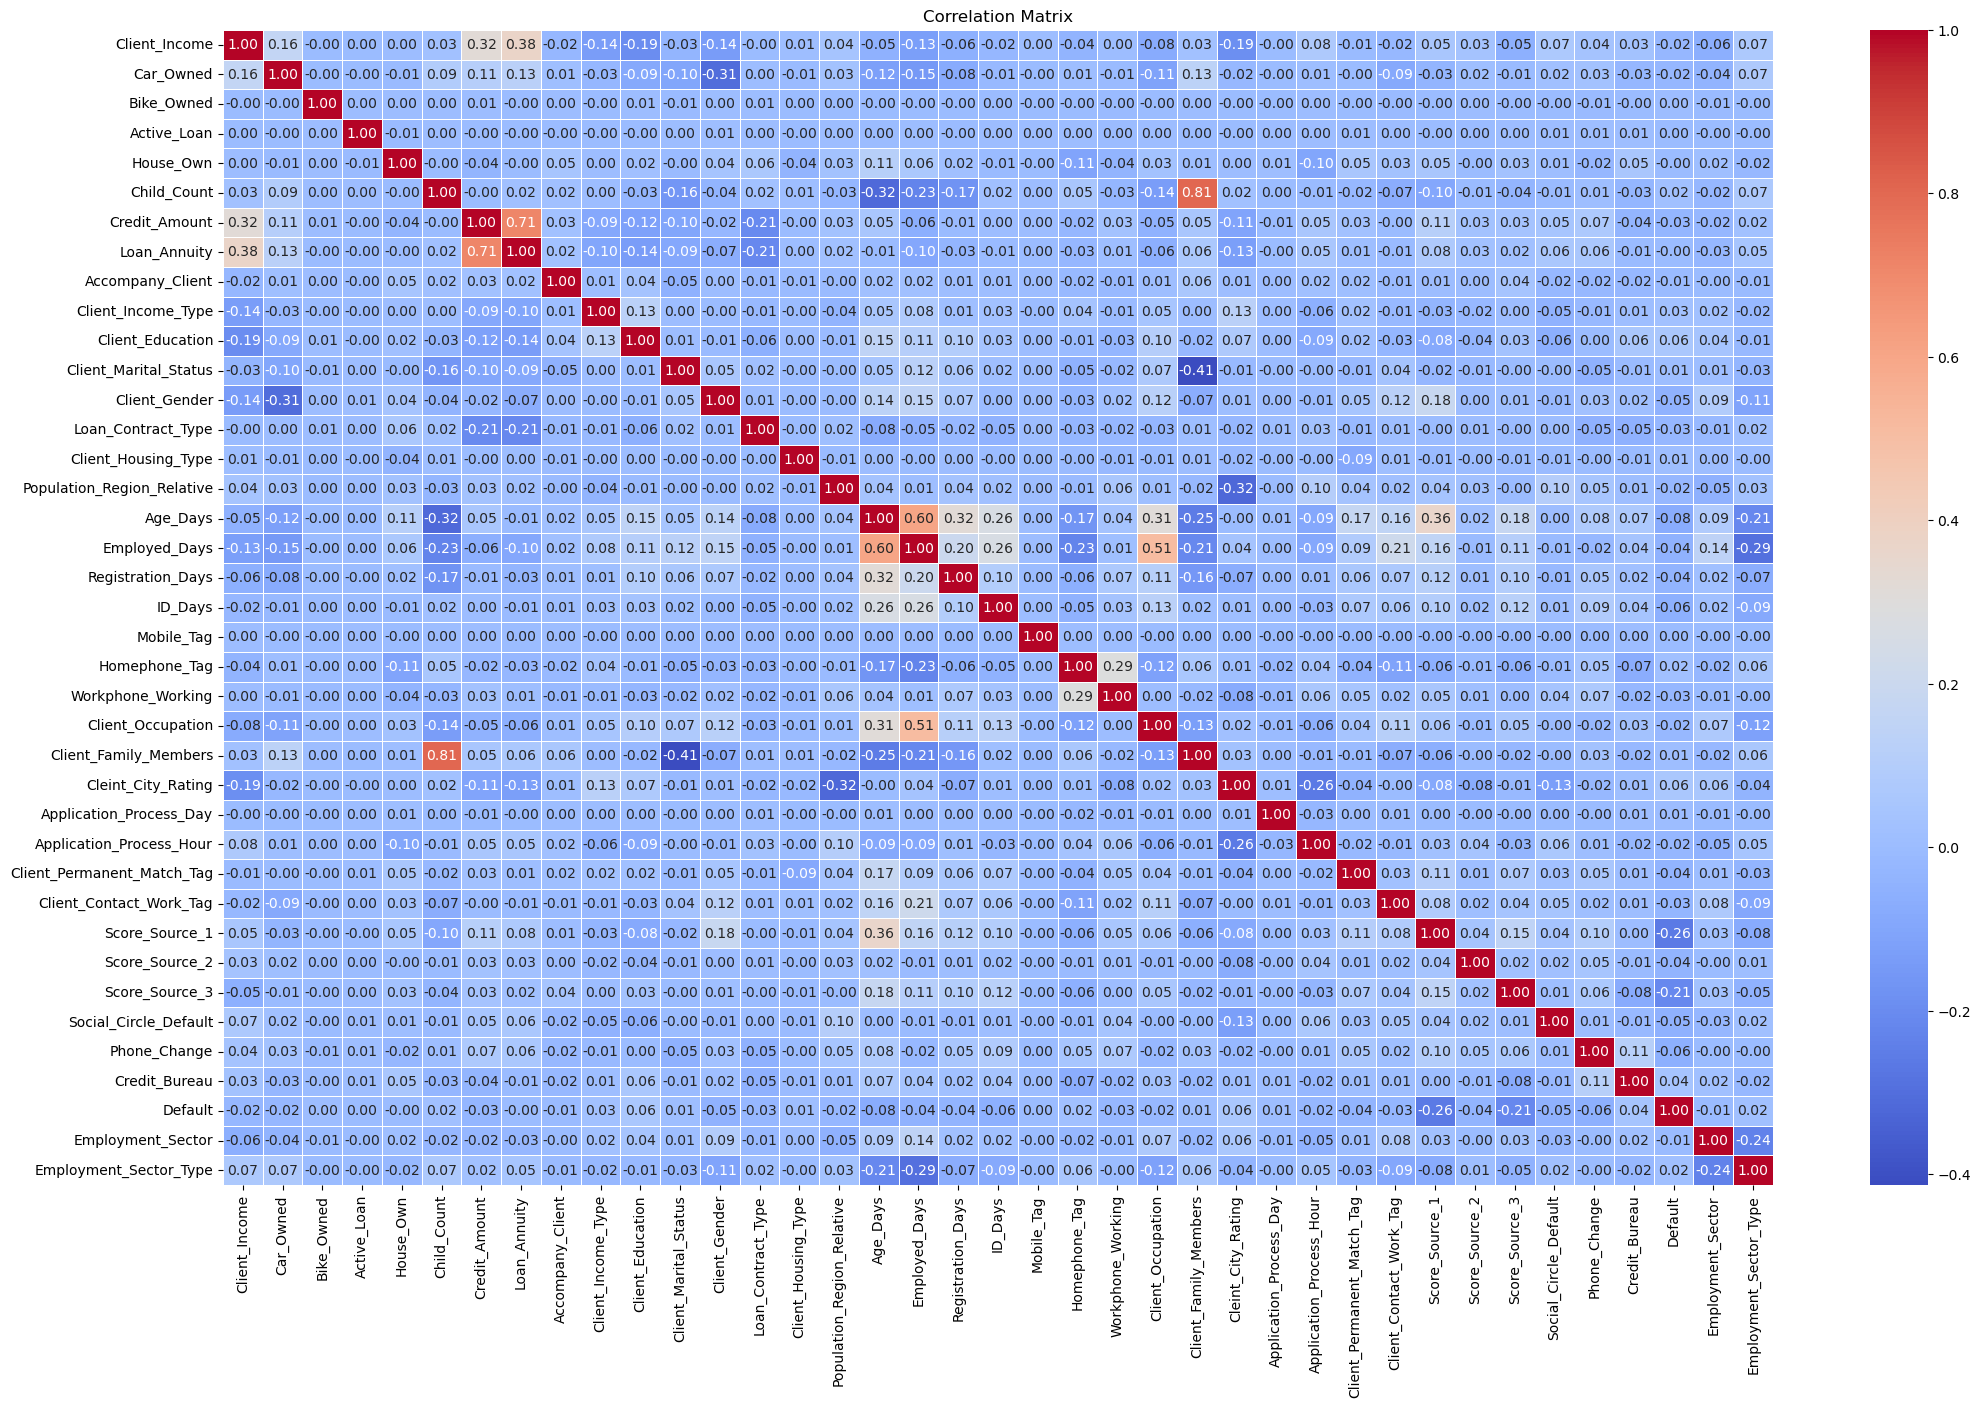

In [74]:
variables = df_al.columns
data = df_al[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
# We created the following visualizations to examine the distributions of the data (investigating bidirectional relationships).
sns.pairplot(df_al, hue='Default', vars=['Score_Source_1', 'Score_Source_3', 'Client_Education', 'House_Own', 'Car_Owned', 'Credit_Amount', 'Client_Income', 'Credit_Amount', 'Client_Gender', 'Age_Days', 'Employed_Days'])

In [76]:
X = df_al.drop('Default',axis=1)
y = df_al['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# We built a LinearRegression model for our dataset.
# We split our dataset into 80% - 20%.
# In the divided dataset, we made predictions on the test data and found our score.

Mean Squared Error: 0.06570912494105852
R2 Score: 0.10605742951782782


In [77]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mean_error = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print('Mean Squared Error:', ridge_mean_error)
print('R2 Score:', ridge_r2)

# We created a more refined model for our LinearRegression model by fitting a Ridge model and making predictions.


Mean Squared Error: 0.06570912238575097
R2 Score: 0.10605746428161744


In [78]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mean_error = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print('Mean Squared Error:', lasso_mean_error)
print('R2 Score:', lasso_r2)

# In addition to fitting the Ridge model, we also fitted a Lasso model to improve our predictions with another 
# regularization model and compare them with our previous predictions.

Mean Squared Error: 0.0735061422947347
R2 Score: -1.742297018836325e-05


In [79]:
X = df_al.drop('Default',axis=1)
y = df_al['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

# We identified the dependent and independent variables.
# We scaled our independent variables to effectively train and make predictions with the model.
# We split our dataset into 80% - 20%.
# We built and trained our Logistic Regression model.
# We made predictions with our trained model and obtained our score.

Accuracy: 0.9172821270310192
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22425
           1       0.41      0.08      0.13      1947

    accuracy                           0.92     24372
   macro avg       0.67      0.53      0.54     24372
weighted avg       0.88      0.92      0.89     24372



Text(50.722222222222214, 0.5, 'True Label')

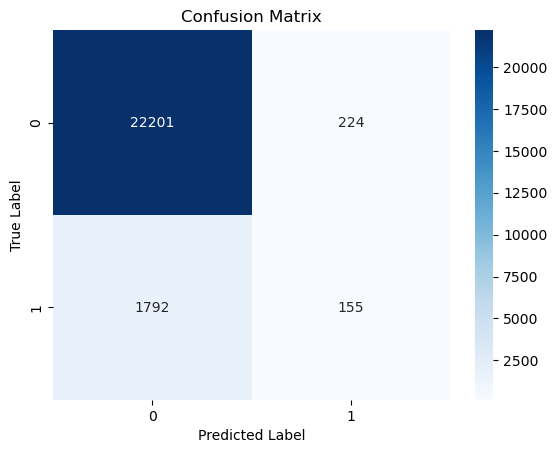

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# We demonstrated the prediction performance of our trained model on the dependent variable using a 'Confusion Matrix'.

Text(0.5, 0, 'False Positive Rate')

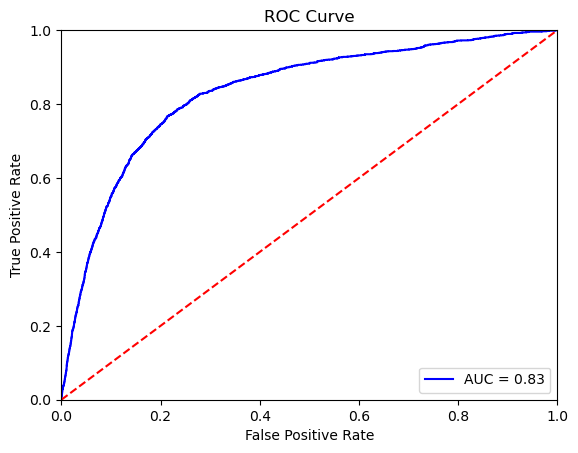

In [81]:
probs = model.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 1.0, 'Modelin Eğitim ve Doğrulama Hatası')

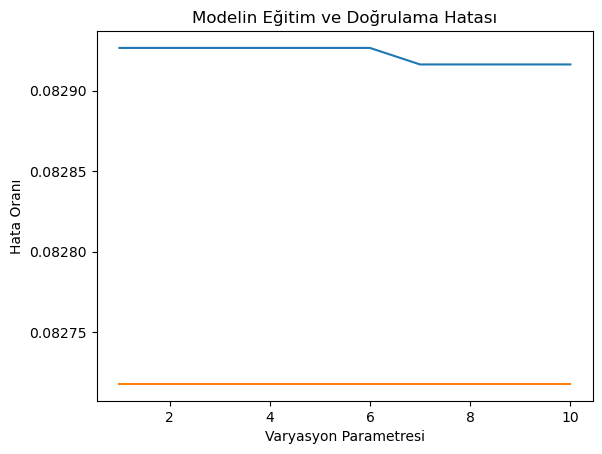

In [82]:
train_errors = []
val_errors = []

for i in range(1, 11):
    model = LogisticRegression(max_iter=1000, C=i)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)

    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_test, val_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)

x = np.arange(1, 11)
plt.plot(x, train_errors, label='Eğitim Hatası')
plt.plot(x, val_errors, label='Doğrulama Hatası')
plt.xlabel('Varyasyon Parametresi')
plt.ylabel('Hata Oranı')
plt.title('Modelin Eğitim ve Doğrulama Hatası')

# In order to validate the accuracy of the score obtained from our LogisticRegression model, we plotted the training and validation errors of our model.
# When interpreting the error rates in the graph, we concluded that there is no overfitting in our prediction model.

In [83]:
param_grid = {'C': [0.01, 0.05, 1.0]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# We performed tuning using the GridSearch modeling technique to obtain the best score.
# We determined the best parameter among the values we provided and learned our score.

Best Parameters: {'C': 1.0}
Best Score: 0.9170838273173514
